In [11]:
import numpy as np
import pickle
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [10]:
# Look at the distribution of accuracies across various locations.

def superquantile(p, arr):
    return np.mean(arr[arr >= np.quantile(arr, p)])

def compute_location_sq(p, y_true, y_pred, locations):
    errs = []
    for loc in np.unique(locations):
        idx = (locations==loc)
        errs.append(1 - accuracy_score(y_true[idx], y_pred[idx]))
    errs = np.array(errs)
    return superquantile(p, errs), errs

In [6]:
metadata = np.load("../data/val_metadata.npy")
y_val = np.load("../out/y_val.npy")

print(y_val.shape)
print(metadata.shape)

locations = metadata[:, 0]

(14961,)
(14961, 9)


LR p-superquantile misclassification error:
p = 0.50

C = 0.000:	0.6518013212662753
C = 0.000:	0.6316782764957426
C = 0.278:	0.6209691591990294
C = 3.594:	0.6210239837604328
C = 46.416:	0.6213499762985966
C = 599.484:	0.6213552372413573
C = 7742.637:	0.6209691591990294
C = 100000.000:	0.6213263020561721


(array([3.16840278, 0.63368056, 0.95052083, 0.63368056, 0.95052083,
        1.26736111, 0.95052083, 1.26736111, 0.        , 0.31684028]),
 array([0.01369863, 0.11232877, 0.2109589 , 0.30958904, 0.40821918,
        0.50684932, 0.60547945, 0.70410959, 0.80273973, 0.90136986,
        1.        ]),
 <BarContainer object of 10 artists>)

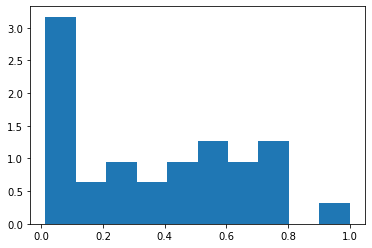

In [14]:
# LR.
p = 0.5
jobs = [0, 1, 4, 5, 6, 7, 8, 9]

print("LR p-superquantile misclassification error:")
print("p = %0.2f\n" % p)
for job_id in jobs:
    print("C = %0.3f:" % np.logspace(-5, 5, 10)[job_id], end="\t")
    y_pred = pickle.load(open("../out/lr_y_pred_%d.p" % job_id, "rb"))
    
    sq, errs = compute_location_sq(p, y_val, y_pred, locations)
    print(sq)
    
plt.hist(errs, density=True)

K-NN p-superquantile misclassification error:
p = 0.50

K = 1:	0.7217093319662978
K = 2:	0.7213891574297919
K = 3:	0.7168001716173771
K = 4:	0.7095004351013967
K = 5:	0.7026980401515142
K = 6:	0.7007435443923783
K = 7:	0.6911474116214014
K = 8:	0.6905899538889307
K = 9:	0.6897015068907246


(array([2.21788194, 1.90104167, 0.        , 0.63368056, 1.26736111,
        0.        , 1.90104167, 1.26736111, 0.63368056, 0.31684028]),
 array([0.01369863, 0.11232877, 0.2109589 , 0.30958904, 0.40821918,
        0.50684932, 0.60547945, 0.70410959, 0.80273973, 0.90136986,
        1.        ]),
 <BarContainer object of 10 artists>)

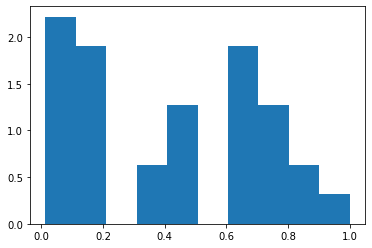

In [15]:
# K-NN
p = 0.5
jobs = np.arange(9) + 1

print("K-NN p-superquantile misclassification error:")
print("p = %0.2f\n" % p)
for job_id in jobs:
    print("K = %d:" % job_id, end="\t")
    y_pred = pickle.load(open("../out/knn_y_pred_%d.p" % job_id, "rb"))
    
    sq, errs = compute_location_sq(p, y_val, y_pred, locations)
    print(sq)
    
plt.hist(errs, density=True)

In [9]:
unique_locations, counts = np.unique(locations, return_counts=True)

print(len(unique_locations))
print(unique_locations)
print(counts)

32
[  3  22  27  40  57  66  79  81 108 114 134 136 143 153 154 171 175 183
 211 217 224 239 260 261 267 269 273 275 279 306 309 320]
[ 750  175  920   46 1442  918  341  175   93   73   88  121  425  217
  204  557  128  105  234  633  227  215 2160    4  171  195  101  209
  179   75 2640 1140]
